<a href="https://colab.research.google.com/github/Claudia-Cabrera/applications-of-machine-learning/blob/main/Cabrera_Sky'sTheLimit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install xgboost
#!pip install lightgbm
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [ ]:
# load libraries
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from imblearn.over_sampling import SMOTE


In [ ]:
# mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/BAN 6053/BAN6025Project2Data.csv')
pd.set_option('display.max_columns', None)
df.head()

,Target_Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200,0,INTERNET,3.743048,other,0,1,0,0


# Explore Data
- 1,000,000 rows and 32 columns
```
# Target Variable = [Target_Y]
```

In [ ]:
print(df.shape)
df.info()

(1000000, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Target_Y  1000000 non-null  int64  
 1   X1        1000000 non-null  float64
 2   X2        1000000 non-null  float64
 3   X3        1000000 non-null  int64  
 4   X4        1000000 non-null  int64  
 5   X5        1000000 non-null  int64  
 6   X6        1000000 non-null  float64
 7   X7        1000000 non-null  float64
 8   X8        1000000 non-null  object 
 9   X9        1000000 non-null  int64  
 10  X10       1000000 non-null  float64
 11  X11       1000000 non-null  float64
 12  X12       1000000 non-null  float64
 13  X13       1000000 non-null  int64  
 14  X14       1000000 non-null  int64  
 15  X15       1000000 non-null  object 
 16  X16       1000000 non-null  int64  
 17  X17       1000000 non-null  int64  
 18  X18       1000000 non-null  object 
 19  X19     

In [ ]:
# check for missing data
df.isnull().sum()

,0
Target_Y,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
X9,0


## **Identify Feature Types**

In [ ]:
df.describe()

,Target_Y,X1,X2,X3,X4,X5,X6,X7,X9,X10,X11,X12,X13,X14,X16,X17,X19,X20,X21,X22,X23,X24,X26,X28,X29,X30,X31
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,0.529886,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,0.499106,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,1.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,1.000000,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


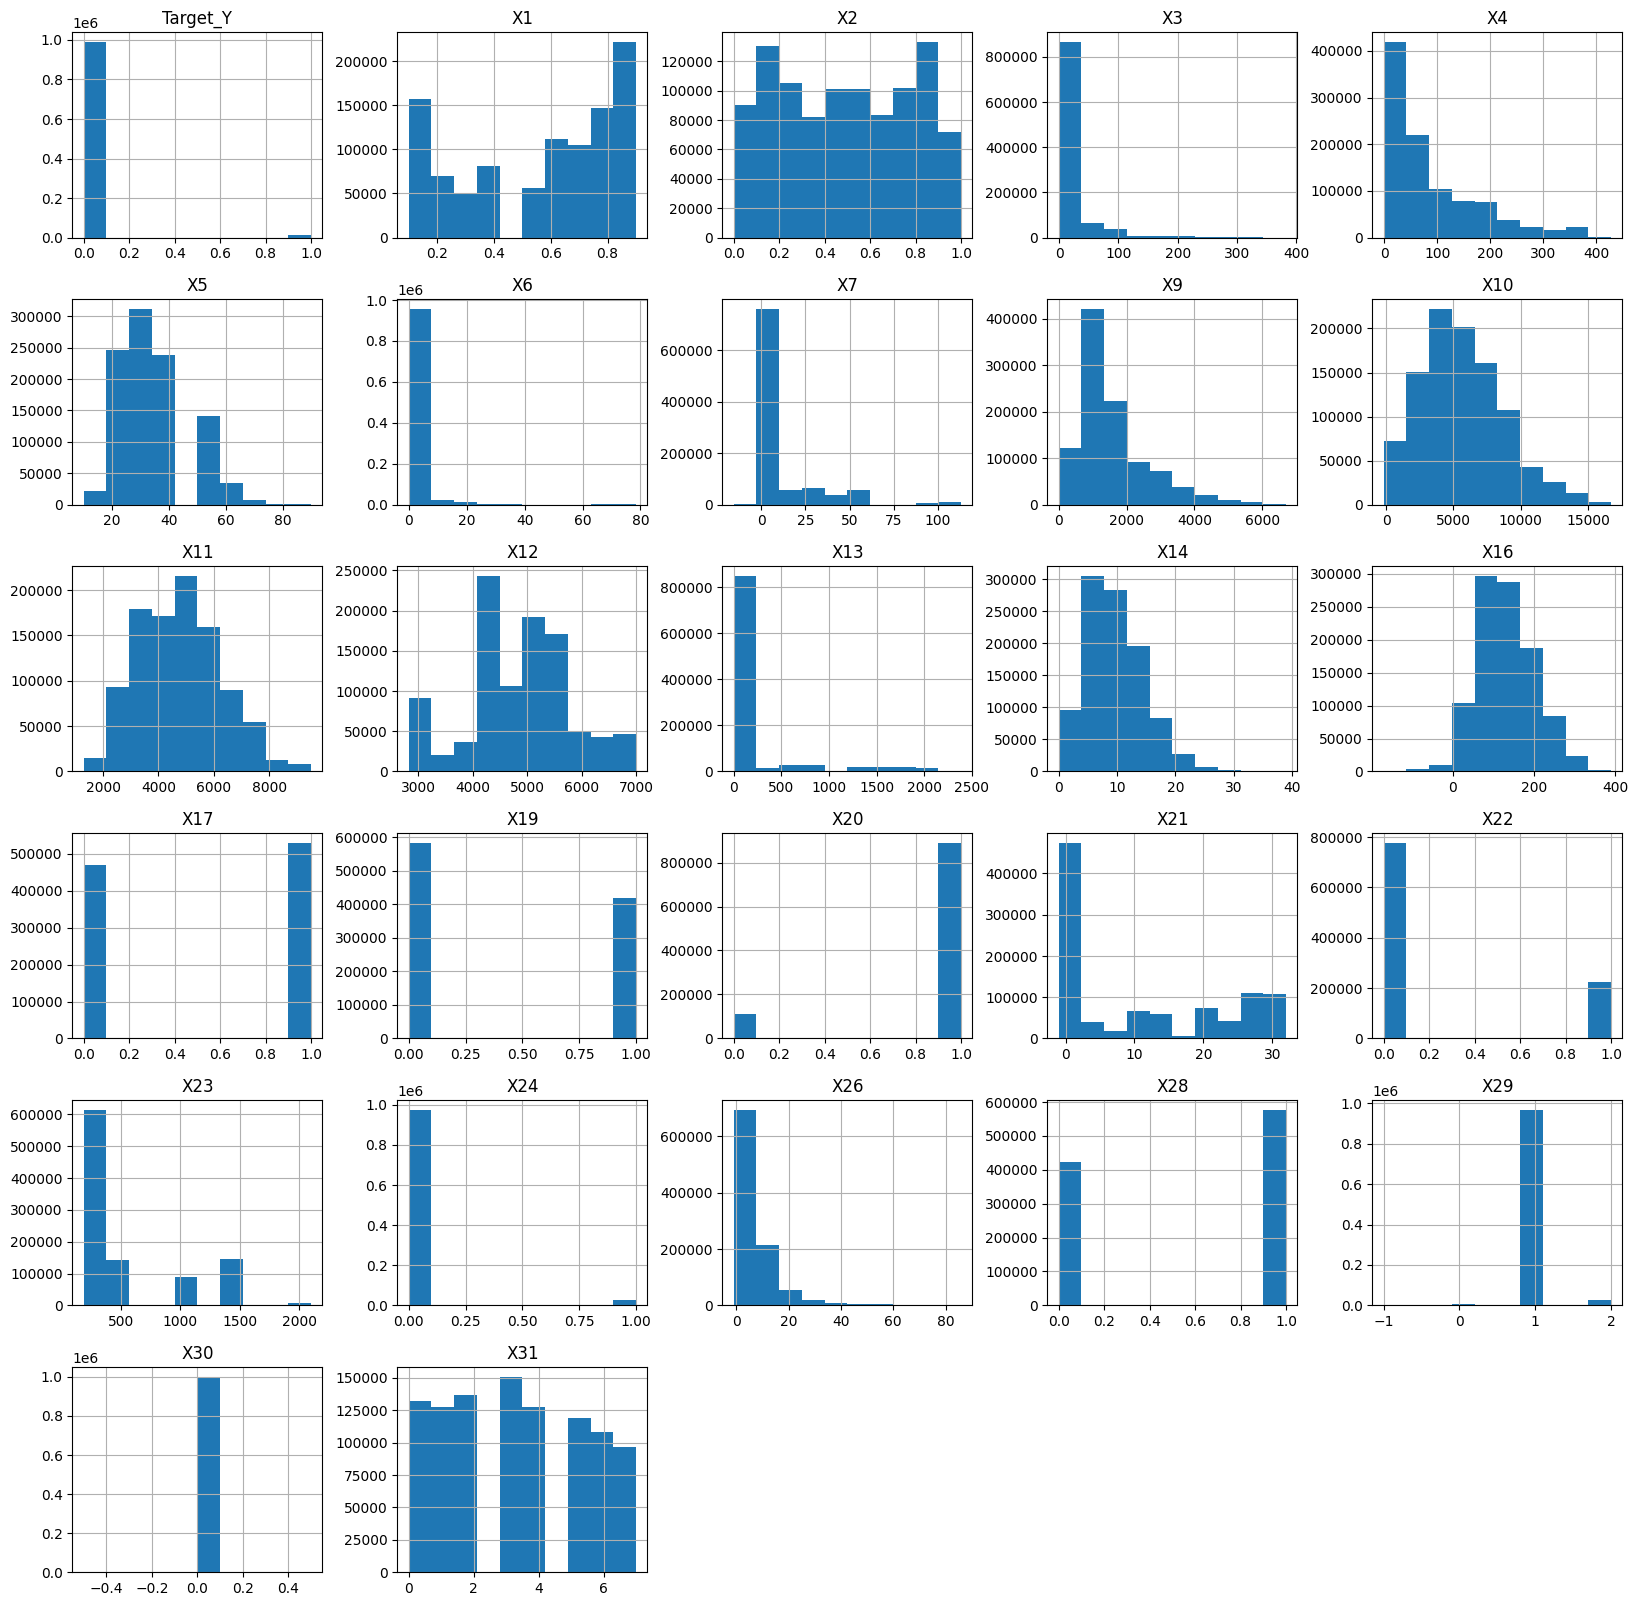

In [ ]:
# check distribution of numerical variables with histogram
df.hist(figsize=(20,20))
plt.show()

In [ ]:
# Figure out which variables are numerical or catgeorical
# variables with only a few unique vars most likely nominal
print(df.nunique())

Target_Y         2
X1               9
X2          998846
X3             374
X4             423
X5               9
X6          983819
X7          994969
X8               5
X9            6306
X10         998687
X11         998940
X12         998318
X13           2326
X14             40
X15              7
X16            551
X17              2
X18              7
X19              2
X20              2
X21             33
X22              2
X23             12
X24              2
X25              2
X26         994887
X27              5
X28              2
X29              4
X30              1
X31              8
dtype: int64


In [ ]:
# print out columns with only 2 unique values that are int
for col in df.columns:
  if df[col].nunique() == 2 and df[col].dtypes == 'int64':
    print(col)

Target_Y
X17
X19
X20
X22
X24
X28


## **Check Correlations**

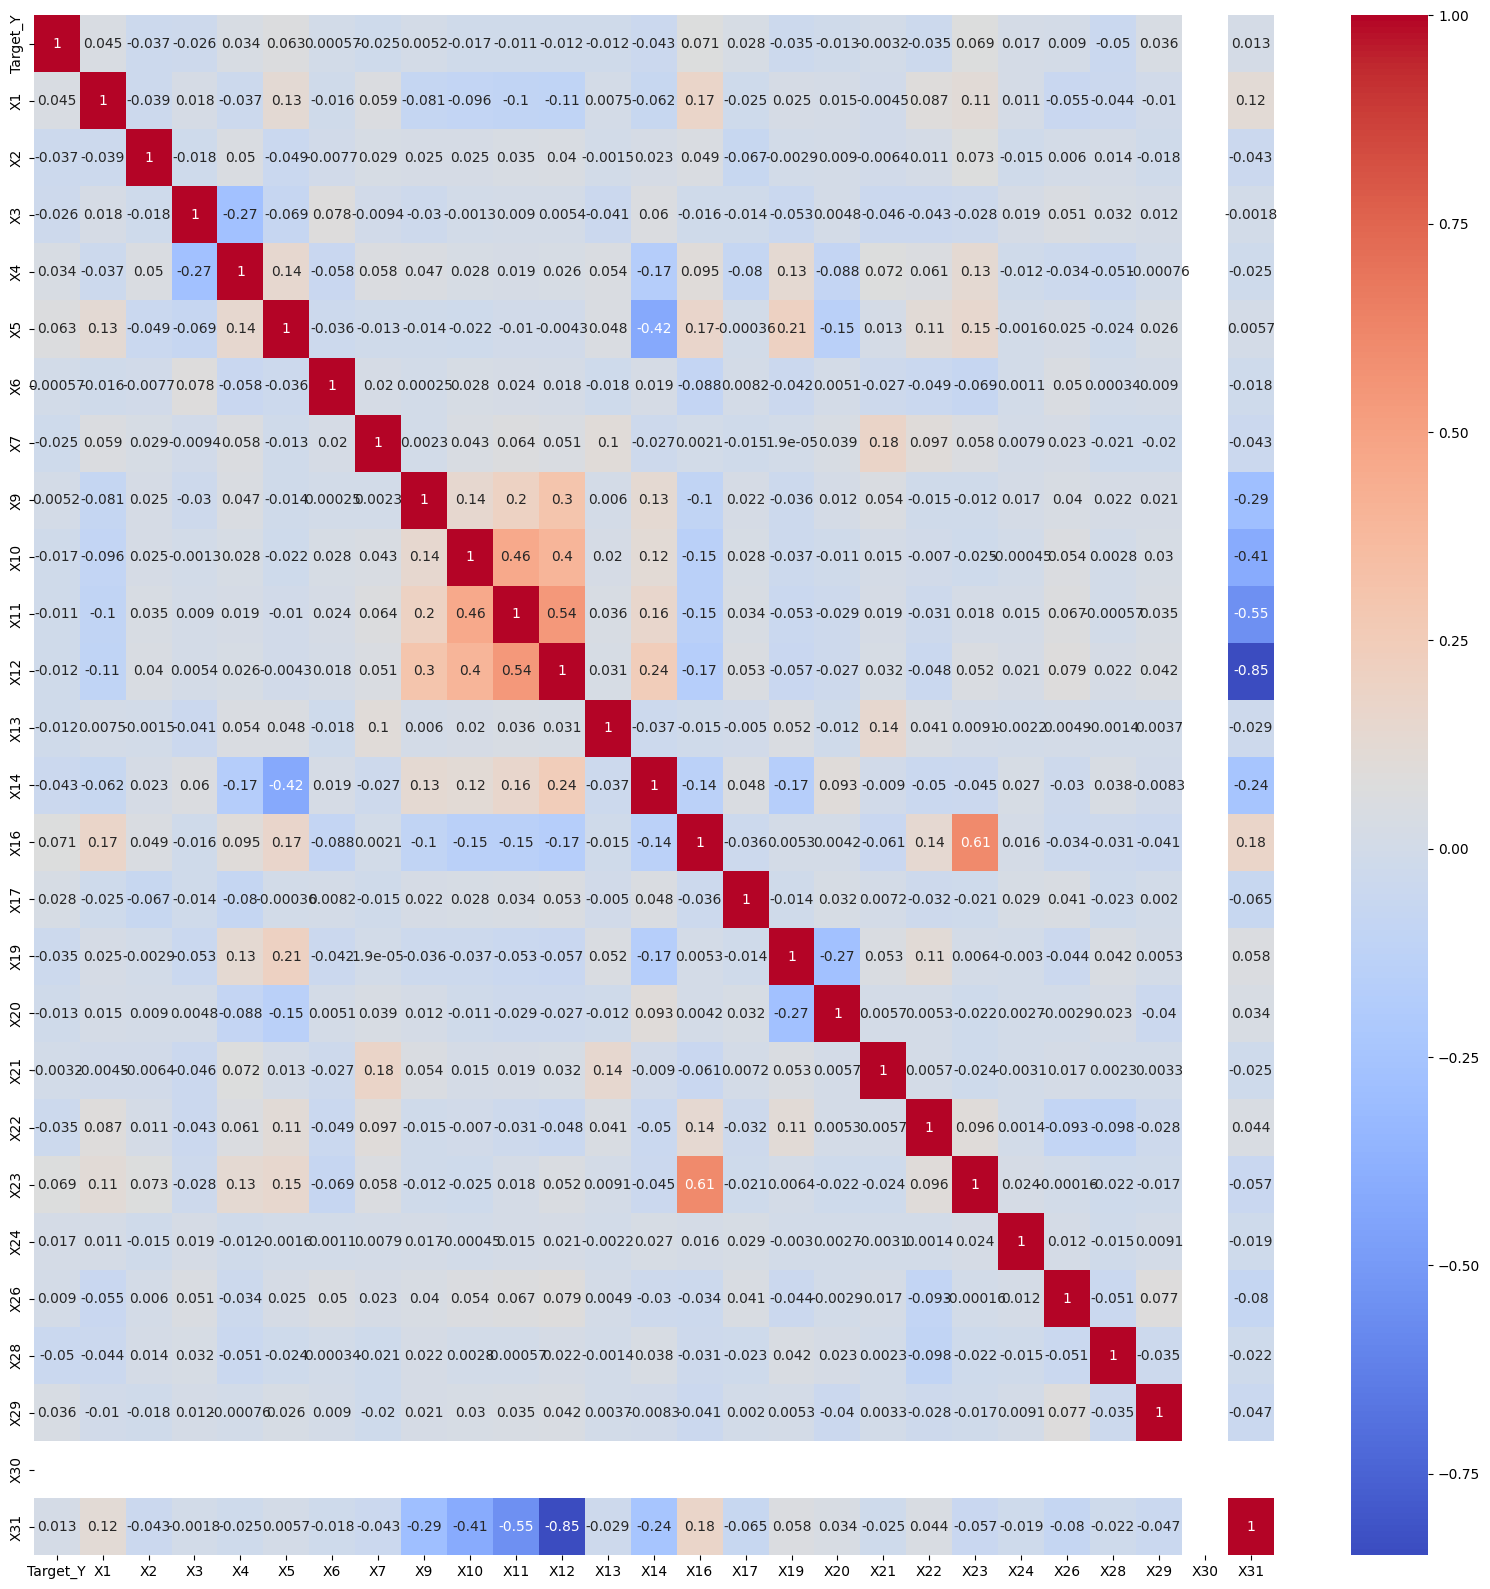

In [ ]:
# create data frame with only integer and float variables
df_num = df.select_dtypes(include=['int64', 'float64'])

# plot correlations
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(), annot=True, cmap = 'coolwarm')
plt.show()

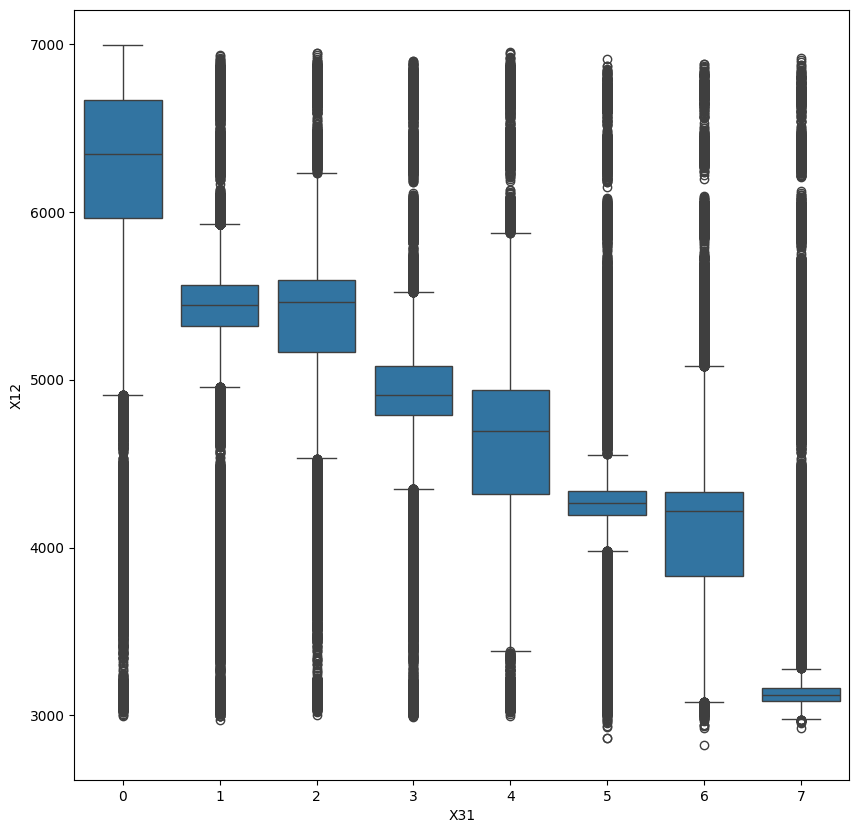

In [ ]:
# investigate relationship between X12 and X31
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='X31', y='X12')
plt.show()

- **X30** only has 1 unique (all the same value) so irrelevant
- Bianary/Boolean Type Vars = YES/NO (2 unique):
```
# Columns: X17, X19, X20, X22, X24, X28
```
- **X12** & **X31** highly correlated
- **X31** may be categorical - histogram shows distinct bars
- **X29** only has 4 -- categorical



# Pre-Process Data

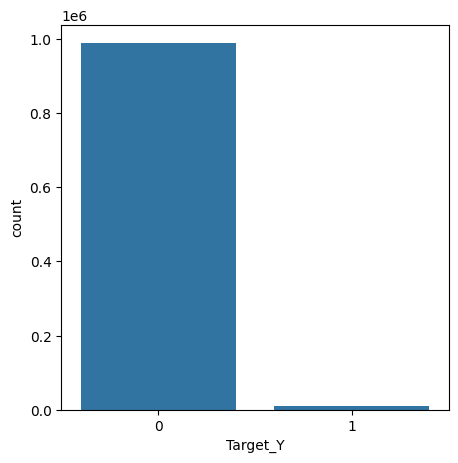

In [ ]:
# convert Target_Y to categorical
df['Target_Y'] = df['Target_Y'].astype('category')
df['Target_Y'].value_counts()

# visualize value counts
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Target_Y')
plt.show()

In [ ]:
# drop irrelevant columns
df.drop('X30', axis = 1, inplace=True)

# Split Data into Training & Test set

In [ ]:
# drop target variable
X = df.drop(columns=['Target_Y'], axis=1)

# get dummy vars
X = pd.get_dummies(X, columns = ['X8', 'X15', 'X17', 'X18', 'X19', 'X20', 'X22', 'X24','X25', 'X27', 'X28', 'X29', 'X31'], drop_first=True, dtype = 'float')
y = df['Target_Y']

# 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700000 entries, 533494 to 228494
Data columns (total 54 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   X1             700000 non-null  float64
 1   X2             700000 non-null  float64
 2   X3             700000 non-null  int64  
 3   X4             700000 non-null  int64  
 4   X5             700000 non-null  int64  
 5   X6             700000 non-null  float64
 6   X7             700000 non-null  float64
 7   X9             700000 non-null  int64  
 8   X10            700000 non-null  float64
 9   X11            700000 non-null  float64
 10  X12            700000 non-null  float64
 11  X13            700000 non-null  int64  
 12  X14            700000 non-null  int64  
 13  X16            700000 non-null  int64  
 14  X21            700000 non-null  int64  
 15  X23            700000 non-null  int64  
 16  X26            700000 non-null  float64
 17  X8_AB          700000 non-nul

# Baseline Model: Logistic Regression

In [ ]:
# fit baseline logisitic regression model
lrm = LogisticRegression()
lrm.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# get predicitions
y_train_pred = lrm.predict(X_train)
y_test_pred = lrm.predict(X_test)

# get probabilties
y_train_prob = lrm.predict_proba(X_train)
y_test_prob = lrm.predict_proba(X_test)

In [ ]:
# Calculate accuracy, recall, prec, and f1 for train data
acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calculate accuracy, recall, prec, and f1 for test data
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9890
Precision: 0.0000
Recall.  : 0.0000
F1.      : 0.0000
 -- test set -- 
Accuracy : 0.9890
Precision: 0.0000
Recall.  : 0.0000
F1.      : 0.0000


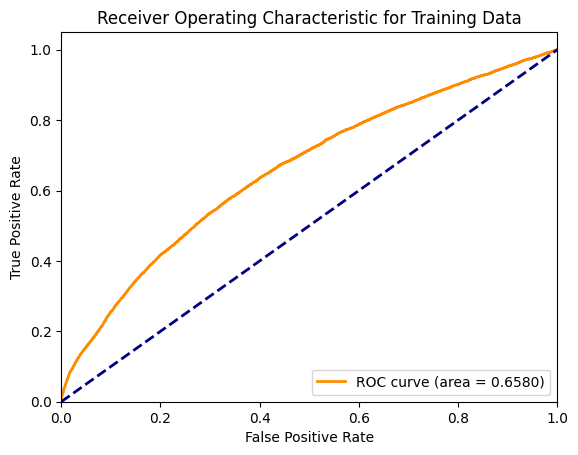

In [ ]:
# Generate ROC curve for train
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_train_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

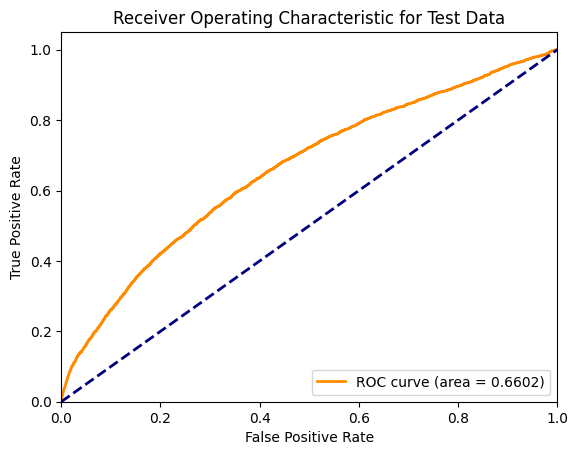

In [ ]:
# Generate ROC curve for train
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()

# Apply SMOTE to handle imbalanced data

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", y_train_resampled.value_counts())

Class distribution after SMOTE:
 Target_Y
0    692280
1    692280
Name: count, dtype: int64


# Try Logistic Regression with SMOTE


In [ ]:
# fit model
lrm_smote = LogisticRegression()
lrm_smote.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
# get predicitions
y_train_pred_smote = lrm_smote.predict(X_train_resampled)
y_test_pred = lrm_smote.predict(X_test)

# get probabilities
y_train_prob_smote = lrm_smote.predict_proba(X_train_resampled)
y_test_prob = lrm_smote.predict_proba(X_test)

In [ ]:
# Calculate accuracy, recall, prec, and f1 for train data
acc_train = accuracy_score(y_train_resampled, y_train_pred_smote)
rec_train = recall_score(y_train_resampled, y_train_pred_smote)
prec_train = precision_score(y_train_resampled, y_train_pred_smote)
f1_train = f1_score(y_train_resampled, y_train_pred_smote)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calculate accuracy, recall, prec, and f1 for test data
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.6744
Precision: 0.6647
Recall.  : 0.7039
F1.      : 0.6837
 -- test set -- 
Accuracy : 0.6479
Precision: 0.0216
Recall.  : 0.6978
F1.      : 0.0419


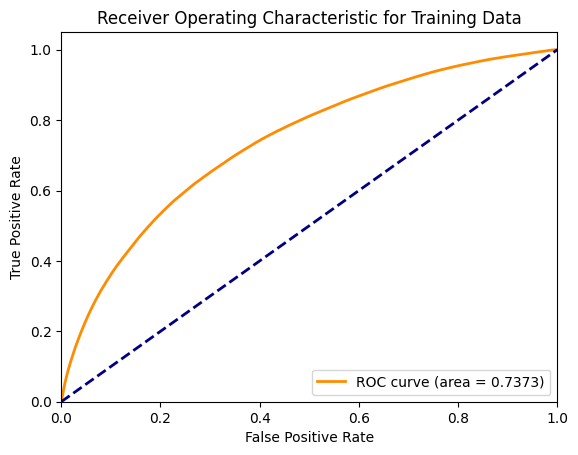

In [ ]:
# Generate ROC curve for train
fpr, tpr, thresholds = roc_curve(y_train_resampled.cat.codes, y_train_prob_smote[:,1])
roc_auc = roc_auc_score(y_train_resampled.cat.codes, y_train_prob_smote[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

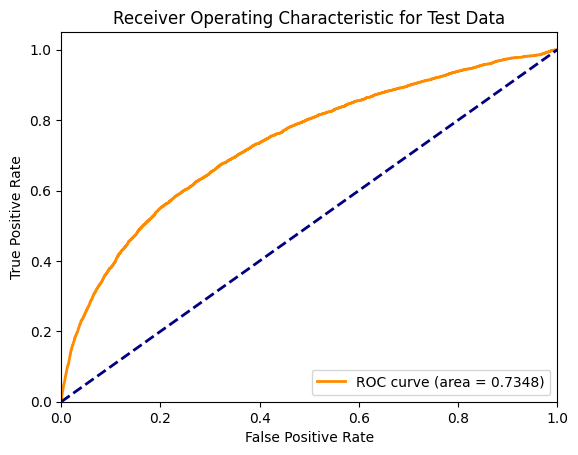

In [ ]:
# Generate ROC curve for train
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()

# Standardize Data

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# fit model
lrm_scaled = LogisticRegression()
lrm_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# get predicitions
y_train_pred = lrm_scaled.predict(X_train_scaled)
y_test_pred = lrm_scaled.predict(X_test_scaled)

# get probabilities
y_train_prob = lrm_scaled.predict_proba(X_train_scaled)
y_test_prob = lrm_scaled.predict_proba(X_test_scaled)

In [ ]:
# calc acc, prec, recall, and f1 for train
acc_train = accuracy_score(y_train.cat.codes, y_train_pred)
rec_train = recall_score(y_train.cat.codes, y_train_pred)
prec_train = precision_score(y_train.cat.codes, y_train_pred)
f1_train = f1_score(y_train.cat.codes, y_train_pred)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# calc acc, prec, recall, and f1 for test
acc_test = accuracy_score(y_test.cat.codes, y_test_pred)
rec_test = recall_score(y_test.cat.codes, y_test_pred)
prec_test = precision_score(y_test.cat.codes, y_test_pred)
f1_test = f1_score(y_test.cat.codes, y_test_pred)

#print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9890
Precision: 0.5698
Recall.  : 0.0132
F1.      : 0.0258
 -- test set -- 
Accuracy : 0.9890
Precision: 0.5946
Recall.  : 0.0133
F1.      : 0.0260


In [ ]:
# Apply smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# fit logistic regresison model
lrm_smote_scaled = LogisticRegression()
lrm_smote_scaled.fit(X_train_resampled, y_train_resampled)

# get predicitons
y_train_pred = lrm_smote_scaled.predict(X_train_resampled)
y_test_pred = lrm_smote_scaled.predict(X_test_scaled)

# get probabilities
y_train_prob = lrm_smote_scaled.predict_proba(X_train_resampled)
y_test_prob = lrm_smote_scaled.predict_proba(X_test_scaled)

In [ ]:
# calc
acc_train = accuracy_score(y_train_resampled.cat.codes, y_train_pred)
rec_train = recall_score(y_train_resampled.cat.codes, y_train_pred)
prec_train = precision_score(y_train_resampled.cat.codes, y_train_pred)
f1_train = f1_score(y_train_resampled.cat.codes, y_train_pred)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# calc
acc_test = accuracy_score(y_test.cat.codes, y_test_pred)
rec_test = recall_score(y_test.cat.codes, y_test_pred)
prec_test = precision_score(y_test.cat.codes, y_test_pred)
f1_test = f1_score(y_test.cat.codes, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))


 -- train set -- 
Accuracy : 0.8288
Precision: 0.8283
Recall.  : 0.8296
F1.      : 0.8290
 -- test set -- 
Accuracy : 0.8282
Precision: 0.0478
Recall.  : 0.7703
F1.      : 0.0900


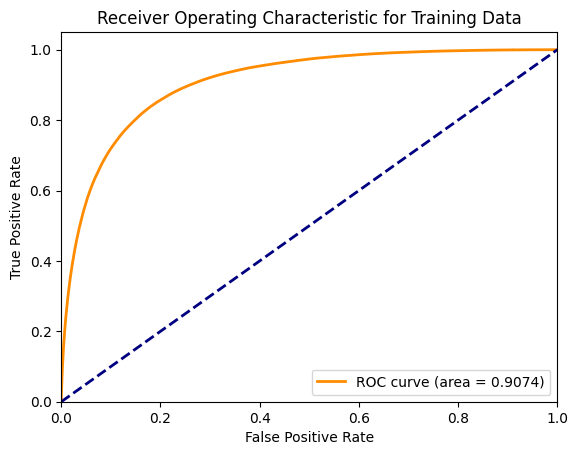

In [ ]:
# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_resampled.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train_resampled.cat.codes, y_train_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# generate roc curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()


# Final notes
- Need SMOTE


# Random Forest Model

In [ ]:
# drop target variable
X = df.drop(columns=['Target_Y'], axis=1)

# get dummy vars
X = pd.get_dummies(X, columns = ['X8', 'X15', 'X17', 'X18', 'X19', 'X20', 'X22', 'X24','X25', 'X27', 'X28', 'X29', 'X31'], drop_first=True, dtype = 'float')
y = df['Target_Y']

# 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700000 entries, 533494 to 228494
Data columns (total 54 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   X1             700000 non-null  float64
 1   X2             700000 non-null  float64
 2   X3             700000 non-null  int64  
 3   X4             700000 non-null  int64  
 4   X5             700000 non-null  int64  
 5   X6             700000 non-null  float64
 6   X7             700000 non-null  float64
 7   X9             700000 non-null  int64  
 8   X10            700000 non-null  float64
 9   X11            700000 non-null  float64
 10  X12            700000 non-null  float64
 11  X13            700000 non-null  int64  
 12  X14            700000 non-null  int64  
 13  X16            700000 non-null  int64  
 14  X21            700000 non-null  int64  
 15  X23            700000 non-null  int64  
 16  X26            700000 non-null  float64
 17  X8_AB          700000 non-nul

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
rf = RandomForestClassifier(n_estimators= 100, random_state=42, max_depth=10, n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
# get predicitions
y_train_pred = rf.predict(X_train_resampled)
y_test_pred = rf.predict(X_test)

# get probabilties
y_train_prob = rf.predict_proba(X_train_resampled)
y_test_prob = rf.predict_proba(X_test)

In [ ]:
# Calc accuracy, prec, recall, and f1 for train data
acc_train = accuracy_score(y_train_resampled, y_train_pred)
rec_train = recall_score(y_train_resampled, y_train_pred)
prec_train = precision_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calc accuracy, prec, recall, and f1 for test data
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))


 -- train set -- 
Accuracy : 0.9822
Precision: 0.9800
Recall.  : 0.9845
F1.      : 0.9822
 -- test set -- 
Accuracy : 0.9722
Precision: 0.1306
Recall.  : 0.2687


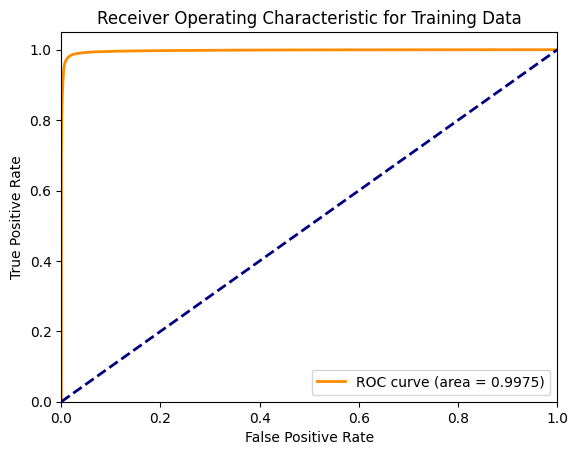

In [ ]:
# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_resampled.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train_resampled.cat.codes, y_train_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

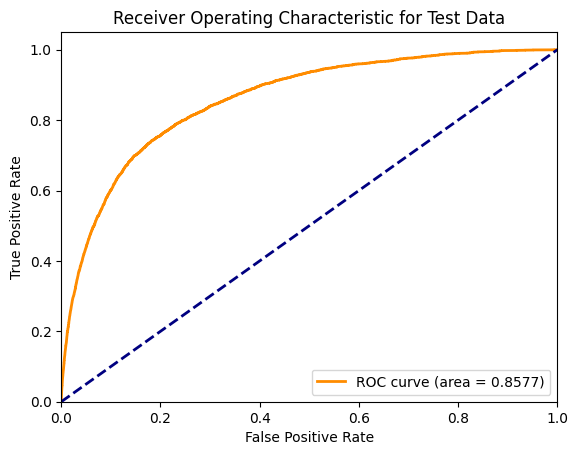

In [ ]:
# generate roc curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()


    importance        feature
41    0.161854    X27_windows
43    0.137322          X28_1
29    0.090196         X18_BC
27    0.079809          X17_1
34    0.078532          X19_1
40    0.062453      X27_other
28    0.061607         X18_BB
18    0.051362          X8_AC
4     0.041302             X5
31    0.038720         X18_BE
36    0.035763          X22_1
3     0.029970             X4
17    0.021013          X8_AB
45    0.012353          X29_1
0     0.011662             X1
21    0.011212         X15_CB
46    0.009146          X29_2
14    0.008207            X21
15    0.007173            X23
39    0.006179  X27_macintosh
35    0.006176          X20_1
22    0.005766         X15_CC
19    0.004490          X8_AD
13    0.003956            X16
2     0.003023             X3
12    0.002422            X14
49    0.002183          X31_3
50    0.001609          X31_4
1     0.001588             X2
6     0.001573             X7
48    0.001458          X31_2
5     0.001429             X6
11    0.00

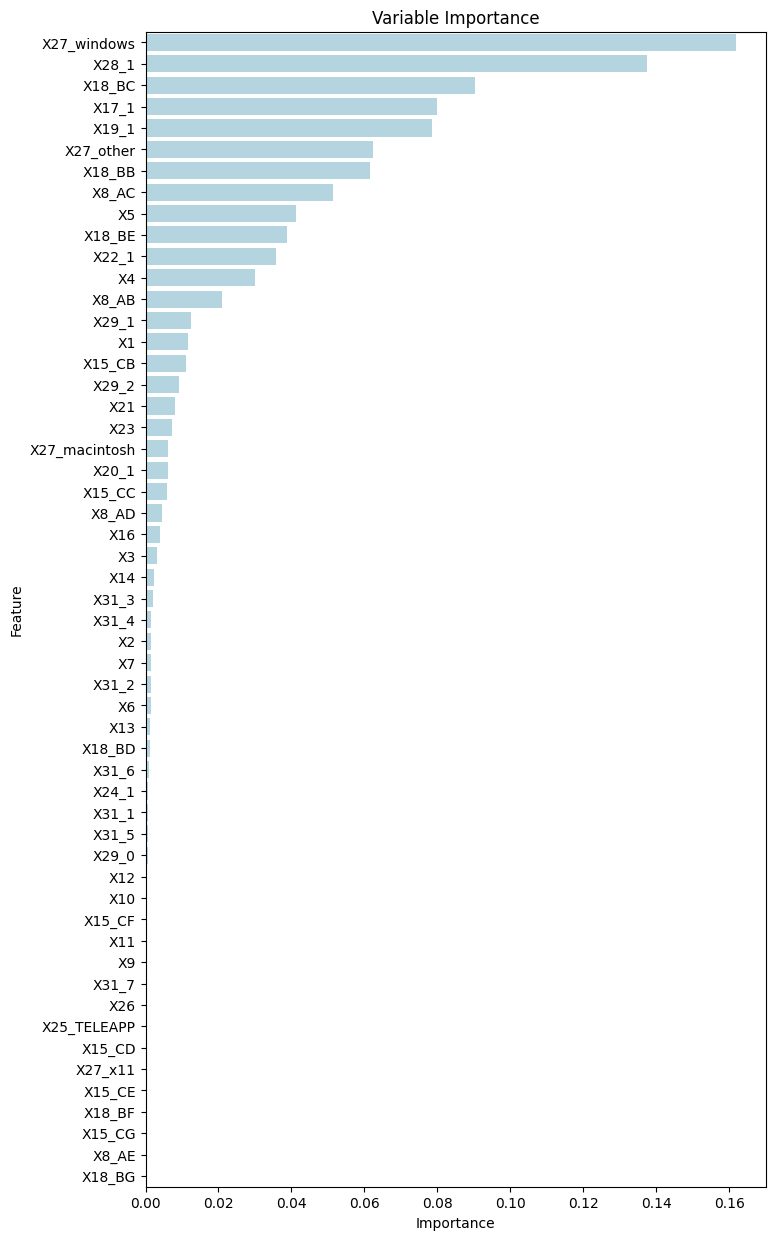

In [ ]:
#calculate feature importance
rf_imp = rf.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = rf_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(8,15))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

# Try Random Forest without X31 as categorical

## Resplit data

In [ ]:
# drop target variable
X = df.drop(columns=['Target_Y'], axis=1)

# get dummy vars
X = pd.get_dummies(X, columns = ['X8', 'X15', 'X17', 'X18', 'X19', 'X20', 'X22', 'X24','X25', 'X27', 'X28', 'X29'], drop_first=True, dtype = 'float')
y = df['Target_Y']

# 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700000 entries, 533494 to 228494
Data columns (total 49 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   X1             700000 non-null  float64
 1   X2             700000 non-null  float64
 2   X3             700000 non-null  int64  
 3   X4             700000 non-null  int64  
 4   X5             700000 non-null  int64  
 5   X6             700000 non-null  float64
 6   X7             700000 non-null  float64
 7   X9             700000 non-null  int64  
 8   X10            700000 non-null  float64
 9   X11            700000 non-null  float64
 10  X12            700000 non-null  float64
 11  X13            700000 non-null  int64  
 12  X14            700000 non-null  int64  
 13  X16            700000 non-null  int64  
 14  X21            700000 non-null  int64  
 15  X23            700000 non-null  int64  
 16  X26            700000 non-null  float64
 17  X30            700000 non-nul

## Apply SMOTE

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Fit Random Forest Model

In [ ]:
rf = RandomForestClassifier(n_estimators= 100, random_state=42, max_depth=10, n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
# get predicitions
y_train_pred = rf.predict(X_train_resampled)
y_test_pred = rf.predict(X_test)

# get probabilties
y_train_prob = rf.predict_proba(X_train_resampled)
y_test_prob = rf.predict_proba(X_test)

In [ ]:
# Calc accuracy, prec, recall, and f1 for train data
acc_train = accuracy_score(y_train_resampled, y_train_pred)
rec_train = recall_score(y_train_resampled, y_train_pred)
prec_train = precision_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calc accuracy, prec, recall, and f1 for test data
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))


 -- train set -- 
Accuracy : 0.9828
Precision: 0.9824
Recall.  : 0.9831
F1.      : 0.9828
 -- test set -- 
Accuracy : 0.9744
Precision: 0.1363
Recall.  : 0.2475
F1.      : 0.1758


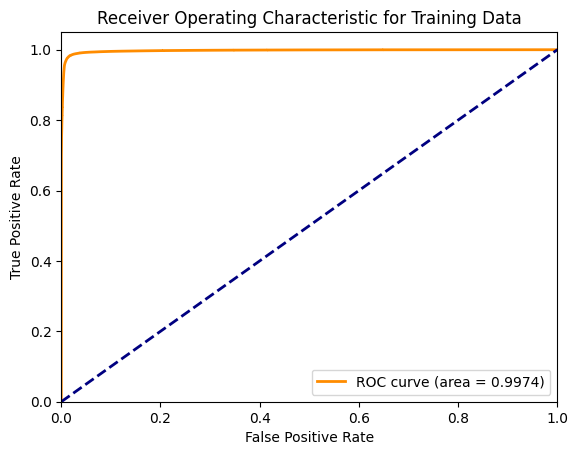

In [ ]:
# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_resampled.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train_resampled.cat.codes, y_train_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

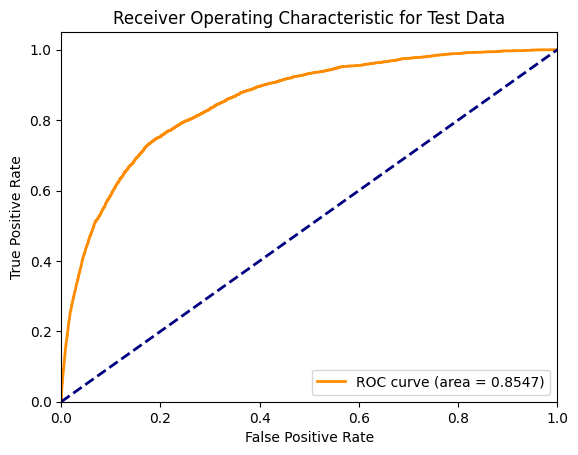

In [ ]:
# generate roc curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()


## Try model with different SMOTE

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42, sampling_strategy = 0.3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# print value counts
print(y_train_resampled.value_counts())

Target_Y
0    692280
1    207684
Name: count, dtype: int64


In [ ]:
rf = RandomForestClassifier(n_estimators= 100, random_state=42, max_depth=10, n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
# get predicitions
y_train_pred = rf.predict(X_train_resampled)
y_test_pred = rf.predict(X_test)

# get probabilties
y_train_prob = rf.predict_proba(X_train_resampled)
y_test_prob = rf.predict_proba(X_test)

In [ ]:
acc_train = accuracy_score(y_train_resampled, y_train_pred)
rec_train = recall_score(y_train_resampled, y_train_pred)
prec_train = precision_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calc accuracy, prec, recall, and f1 for test data
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9834
Precision: 0.9893
Recall.  : 0.9384
F1.      : 0.9632
 -- test set -- 
Accuracy : 0.9868
Precision: 0.2177
Recall.  : 0.0752
F1.      : 0.1118


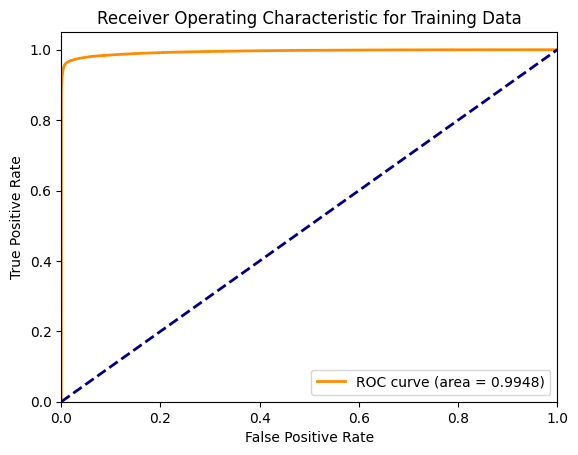

In [ ]:
# Generate ROC curve for train
fpr, tpr, thresholds = roc_curve(y_train_resampled.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train_resampled.cat.codes, y_train_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

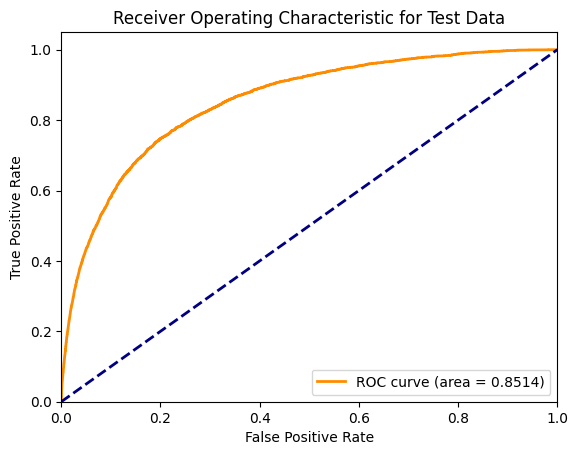

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()

### Final Notes
- Model really overfitting
- Keep SMOTE as original

## Re-apply SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Get predicitions
y_train_pred = gb.predict(X_train_resampled)
y_test_pred = gb.predict(X_test)

# get probabilities
y_train_prob = gb.predict_proba(X_train_resampled)
y_test_prob = gb.predict_proba(X_test)

In [ ]:
# Calc accuracy, prec, recall, and f1
acc_train = accuracy_score(y_train_resampled, y_train_pred)
rec_train = recall_score(y_train_resampled, y_train_pred)
prec_train = precision_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calc accuracy, prec, recall, and f1 for test

acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9877
Precision: 0.9930
Recall.  : 0.9823
F1.      : 0.9876
 -- test set -- 
Accuracy : 0.9837
Precision: 0.1895
Recall.  : 0.1454
F1.      : 0.1645


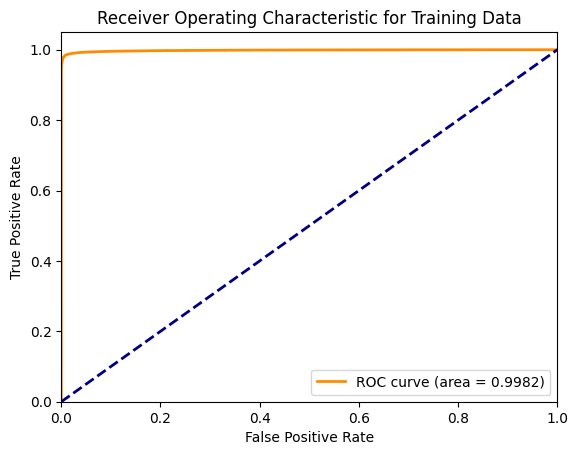

In [ ]:
# Generate ROC curve for train
fpr, tpr, thresholds = roc_curve(y_train_resampled.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train_resampled.cat.codes, y_train_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

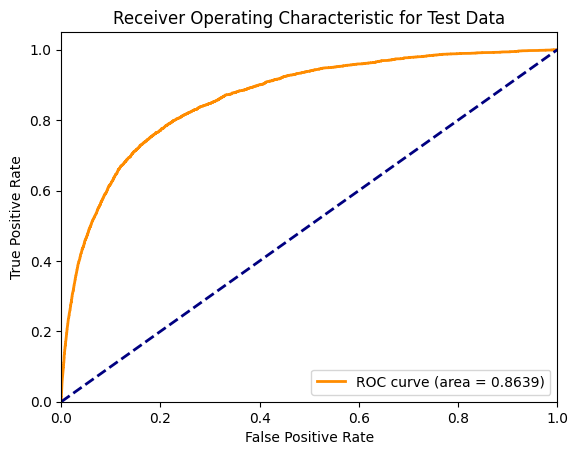

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()

### Base Model Notes
- overfitting

## Tune Parameters (w/o Grid search since so long)

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=50,  # Reduce trees further
                                 learning_rate=0.05,  # Lower learning rate
                                 max_depth=3,
                                 subsample=0.8,  # Prevent overfitting
                                 random_state=42)

gbc.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42,
                           subsample=0.8)

In [ ]:
# get predicitions
y_train_pred = gbc.predict(X_train_resampled)
y_test_pred = gbc.predict(X_test)

# get probabilties
y_train_prob = gbc.predict_proba(X_train_resampled)
y_test_prob = gbc.predict_proba(X_test)

In [ ]:
# Calc accuracy, prec, recall, and f1
acc_train = accuracy_score(y_train_resampled, y_train_pred)
rec_train = recall_score(y_train_resampled, y_train_pred)
prec_train = precision_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calc accuracy, prec, recall, and f1 for test

acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9628
Precision: 0.9702
Recall.  : 0.9549
F1.      : 0.9625
 -- test set -- 
Accuracy : 0.9630
Precision: 0.0956
Recall.  : 0.2783
F1.      : 0.1423


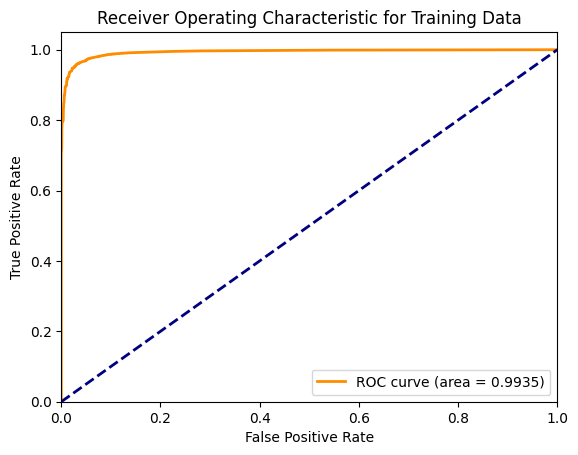

In [ ]:
# Generate ROC curve for train
fpr, tpr, thresholds = roc_curve(y_train_resampled.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train_resampled.cat.codes, y_train_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

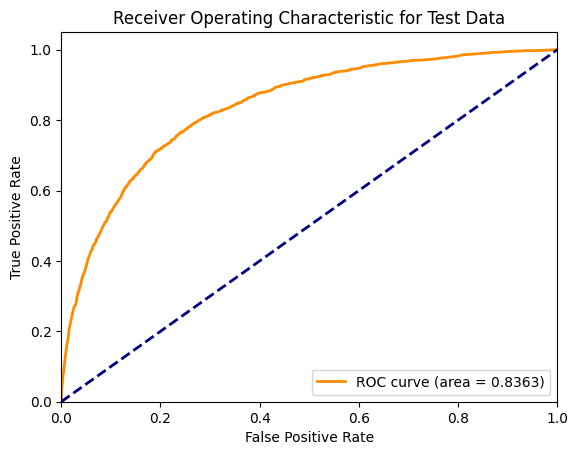

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()

## Get feature importance

      importance        feature
43  4.128212e-01    X27_windows
45  1.887753e-01          X28_1
36  7.609682e-02          X19_1
29  7.584805e-02          X17_1
20  6.032011e-02          X8_AC
31  4.728943e-02         X18_BC
30  3.613257e-02         X18_BB
33  3.397422e-02         X18_BE
4   2.316606e-02             X5
38  1.891011e-02          X22_1
41  7.903289e-03  X27_macintosh
47  6.244587e-03          X29_1
3   4.787028e-03             X4
48  4.063602e-03          X29_2
24  3.261464e-03         X15_CC
42  2.488821e-04      X27_other
15  1.573318e-04            X23
32  0.000000e+00         X18_BD
16  0.000000e+00            X26
13  0.000000e+00            X16
14  0.000000e+00            X21
11  0.000000e+00            X13
12  0.000000e+00            X14
10  0.000000e+00            X12
8   0.000000e+00            X10
1   0.000000e+00             X2
7   0.000000e+00             X9
6   0.000000e+00             X7
5   0.000000e+00             X6
2   0.000000e+00             X3
0   0.00

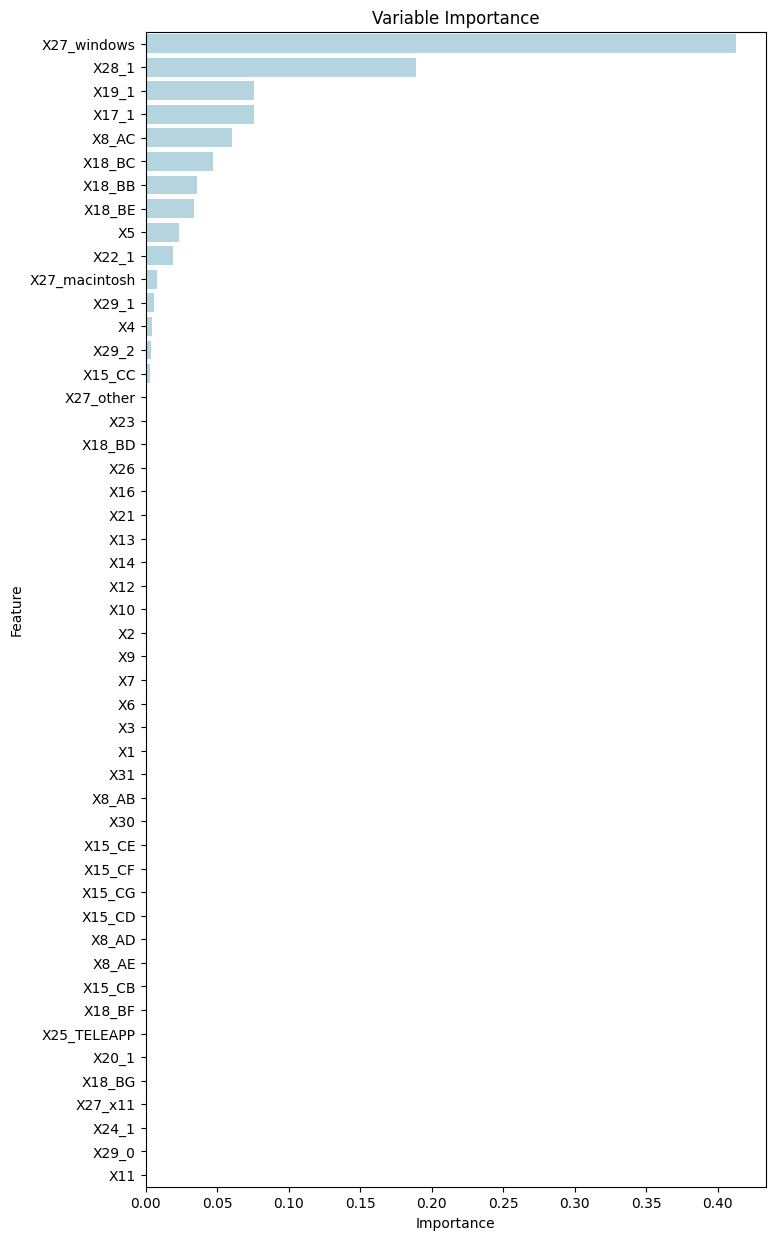

In [ ]:
#calculate feature importance
gb_imp = gbc.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = gb_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(8,15))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

## Fit Gradient Boosting w/ only top features

In [ ]:
top_features = ['X27_windows', 'X28_1', 'X19_1', 'X17_1', 'X8_AC',
                'X18_BC', 'X18_BB', 'X18_BE', 'X5', 'X22_1']

X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

In [ ]:
X_train_reduced = X_train_resampled[top_features]
X_test_reduced = X_test[top_features]  # No need to resample test data

print("X_train shape after SMOTE and feature selection:", X_train_reduced.shape)
print("y_train shape after SMOTE:", y_train_resampled.shape)


X_train shape after SMOTE and feature selection: (1384560, 10)
y_train shape after SMOTE: (1384560,)


In [ ]:
gb = GradientBoostingClassifier(n_estimators=50,  # Reduce trees further
                                 learning_rate=0.05,  # Lower learning rate
                                 max_depth=3,
                                 subsample=0.8,
                                 random_state=42)

gb.fit(X_train_reduced, y_train_resampled)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42,
                           subsample=0.8)

In [ ]:
# get predicitions
y_train_pred = gb.predict(X_train_reduced)
y_test_pred = gb.predict(X_test_reduced)

# get probabilties
y_train_prob = gb.predict_proba(X_train_reduced)
y_test_prob = gb.predict_proba(X_test_reduced)

In [ ]:
# calc acc, prec, recall, and f1 for training data
acc_train = accuracy_score(y_train_resampled, y_train_pred)
rec_train = recall_score(y_train_resampled, y_train_pred)
prec_train = precision_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calc acc, pred, recall, and f1 for test data
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9614
Precision: 0.9703
Recall.  : 0.9519
F1.      : 0.9610
 -- test set -- 
Accuracy : 0.9632
Precision: 0.0961
Recall.  : 0.2774
F1.      : 0.1427


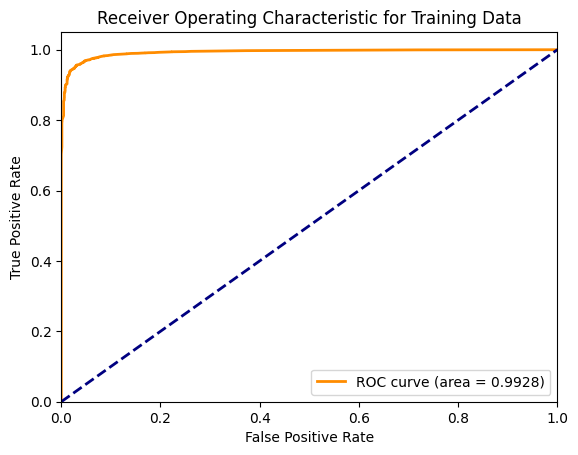

In [ ]:
# Generate ROC curve for train
fpr, tpr, thresholds = roc_curve(y_train_resampled.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train_resampled.cat.codes, y_train_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

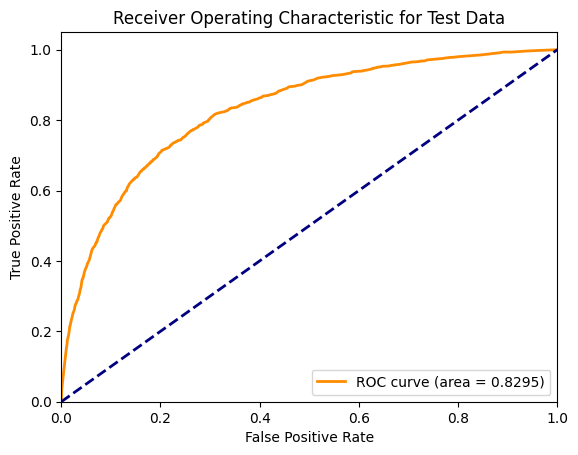

In [ ]:
# Generate ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()

# LightGBM Model

### Resplit data

In [ ]:
# reload data
df = pd.read_csv('/content/drive/MyDrive/BAN 6053/BAN6025Project2Data.csv')
# convert Target_Y to category
df['Target_Y'] = df['Target_Y'].astype('category')
# drop X30
df = df.drop(columns=['X30'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['X8', 'X15', 'X17', 'X18', 'X19', 'X20', 'X22', 'X24','X25', 'X27', 'X28', 'X29']
for col in categorical_features:
    X_train_resampled[col] = X_train_resampled[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [ ]:
# drop Y
X = df.drop(columns=['Target_Y'])
y = df['Target_Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# reapply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=42, n_jobs=-1)
lgbm.fit(X_train_resampled, y_train_resampled)

[LightGBM] [Info] Number of positive: 692185, number of negative: 692185
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.194966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3770
[LightGBM] [Info] Number of data points in the train set: 1384370, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(n_jobs=-1, random_state=42)

In [ ]:
# generate predicitions
y_train_pred = lgbm.predict(X_train_resampled)
y_test_pred = lgbm.predict(X_test)

# generate probabilities
y_train_prob = lgbm.predict_proba(X_train_resampled)
y_test_prob = lgbm.predict_proba(X_test)

In [ ]:
# Calculate acc, prec, recall, and f1 for training data
acc_train = accuracy_score(y_train_resampled, y_train_pred)
rec_train = recall_score(y_train_resampled, y_train_pred)
prec_train = precision_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calc for test
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))


 -- train set -- 
Accuracy : 0.9833
Precision: 0.9894
Recall.  : 0.9770
F1.      : 0.9831
 -- test set -- 
Accuracy : 0.9807
Precision: 0.1490
Recall.  : 0.1696
F1.      : 0.1586


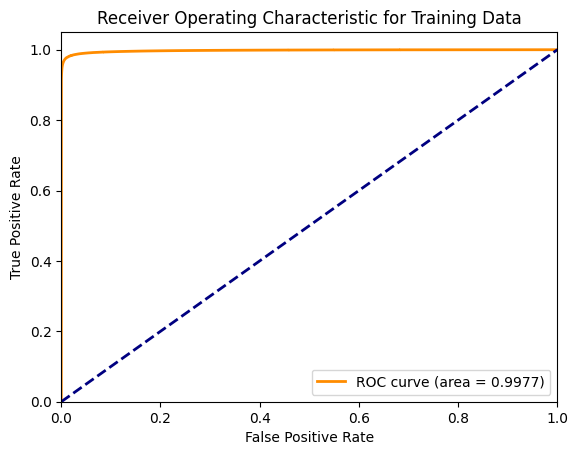

In [ ]:
# Generate ROC curve for train
fpr, tpr, thresholds = roc_curve(y_train_resampled.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train_resampled.cat.codes, y_train_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

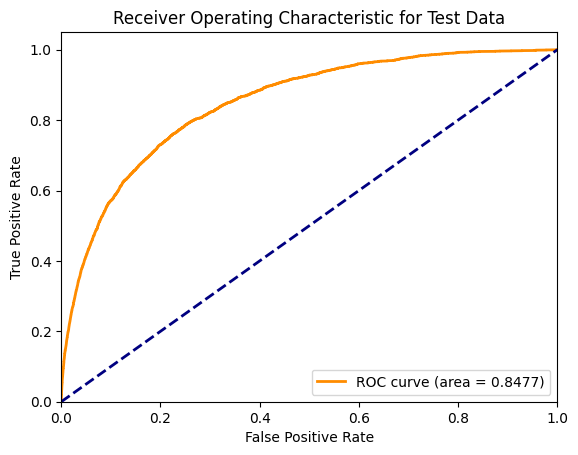

In [ ]:
# Generate ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()

## Fit model without smote

In [ ]:
# train lgbm on original data
lgbm = LGBMClassifier(random_state=42, is_unbalance = True, n_jobs=-1)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 7815, number of negative: 692185
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.248760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3214
[LightGBM] [Info] Number of data points in the train set: 700000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.011164 -> initscore=-4.483808
[LightGBM] [Info] Start training from score -4.483808


LGBMClassifier(is_unbalance=True, n_jobs=-1, random_state=42)

In [ ]:
# get predicitions
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

# get probabilities
y_train_prob = lgbm.predict_proba(X_train)
y_test_prob = lgbm.predict_proba(X_test)

In [ ]:
# Calculate accuracy, precision, recall, and f1 for train data
acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calculate accuracy, precision, recall, and f1 for test data
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.8224
Precision: 0.0514
Recall.  : 0.8537
F1.      : 0.0969
 -- test set -- 
Accuracy : 0.8213
Precision: 0.0450
Recall.  : 0.7754
F1.      : 0.0850


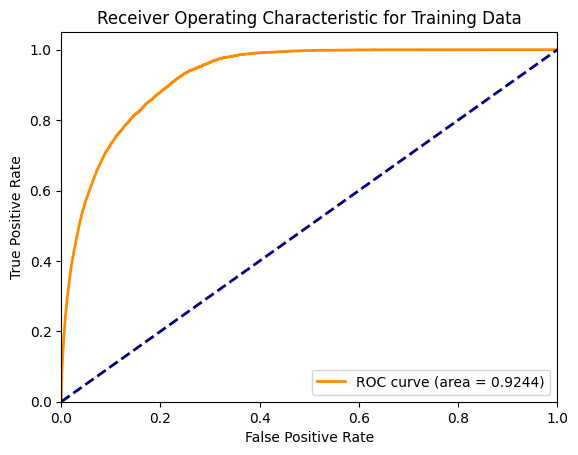

In [ ]:
# Generate ROC Curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_train_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()


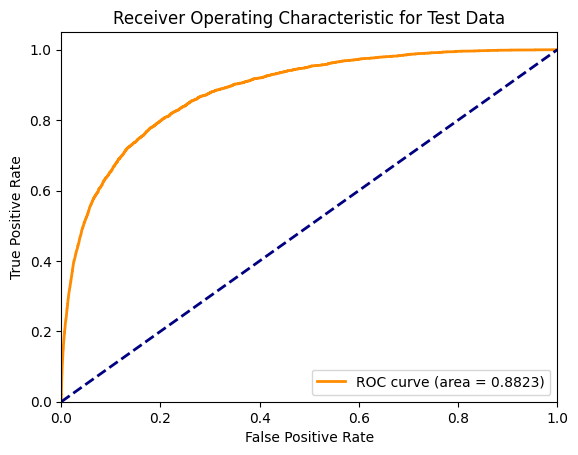

In [ ]:
# Generate ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()


## Fit Model with reguarlization

In [ ]:
lgbm = LGBMClassifier(random_state=42, is_unbalance = True, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 7815, number of negative: 692185
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.225881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3214
[LightGBM] [Info] Number of data points in the train set: 700000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.011164 -> initscore=-4.483808
[LightGBM] [Info] Start training from score -4.483808


LGBMClassifier(is_unbalance=True, n_jobs=-1, random_state=42, reg_alpha=0.5,
               reg_lambda=0.5)

In [ ]:
# get predictions
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

# get probabilities
y_train_prob = lgbm.predict_proba(X_train)
y_test_prob = lgbm.predict_proba(X_test)

In [ ]:
# Calculate accuracy, prec, recall and f1 for training
acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.8243
Precision: 0.0517
Recall.  : 0.8489
F1.      : 0.0974
 -- test set -- 
Accuracy : 0.8231
Precision: 0.0452
Recall.  : 0.7707
F1.      : 0.0854


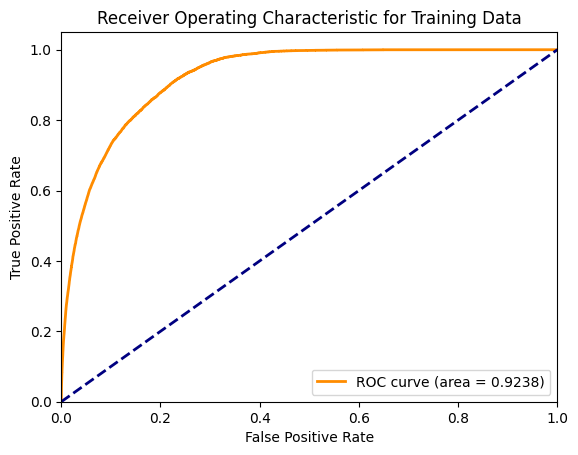

In [ ]:
# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_train_prob[:,1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()


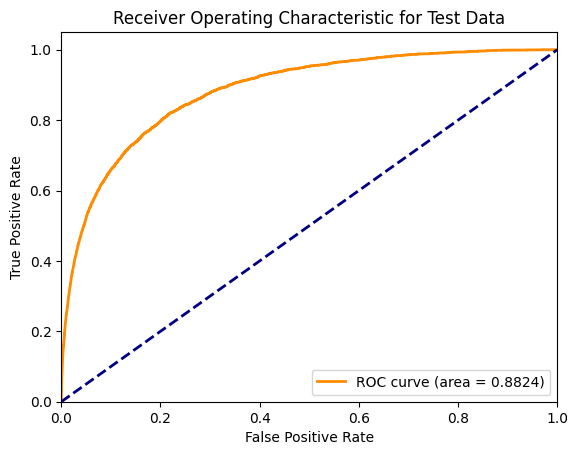

In [ ]:
# Generate ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()


## Fit Model with SMOTE and regularization

In [ ]:
lgbm = LGBMClassifier(
    learning_rate=0.01,
    n_estimators=500,
    max_depth=5,
    num_leaves=31,
    colsample_bytree=0.8,
    subsample=0.8,
    min_data_in_leaf=200,
    scale_pos_weight=5,
    reg_alpha=0.5,
    reg_lambda=0.5,
    random_state=42
)
lgbm.fit(X_train_resampled, y_train_resampled)

[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Info] Number of positive: 692185, number of negative: 692185
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.217789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3770
[LightGBM] [Info] Number of data points in the train set: 1384370, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=5,
               min_data_in_leaf=200, n_estimators=500, random_state=42,
               reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=5,
               subsample=0.8)

In [ ]:
# get predictions
y_train_pred = lgbm.predict(X_train_resampled)
y_test_pred = lgbm.predict(X_test)

# get probabilities
y_train_prob = lgbm.predict_proba(X_train_resampled)
y_test_prob = lgbm.predict_proba(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200


In [ ]:
# Calc
acc_train = accuracy_score(y_train_resampled, y_train_pred)
rec_train = recall_score(y_train_resampled, y_train_pred)
prec_train = precision_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)

# Print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9041
Precision: 0.8443
Recall.  : 0.9910
F1.      : 0.9118
 -- test set -- 
Accuracy : 0.8157
Precision: 0.0389
Recall.  : 0.6842
F1.      : 0.0737


Text(0.5, 1.0, 'Receiver Operating Characteristic for Training Data')

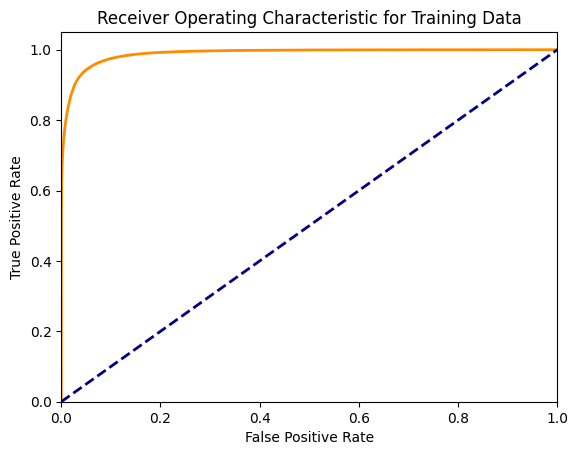

In [ ]:
# Generate roc curve
fpr, tpr, thresholds = roc_curve(y_train_resampled.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train_resampled.cat.codes, y_train_prob[:,1])

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')

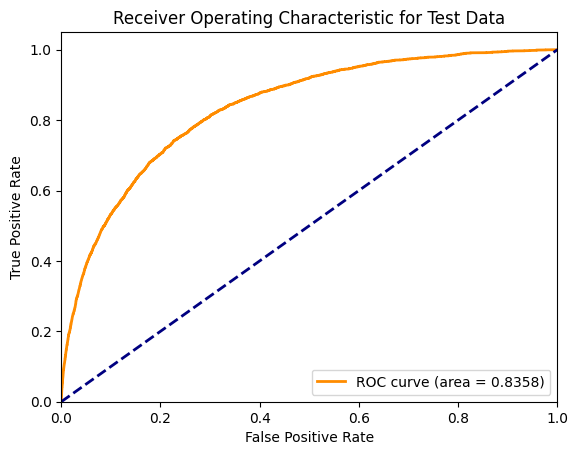

In [ ]:
# Generate ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()

# XGBoost Model

In [ ]:
from gc import enable
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=5,
    scale_pos_weight=5,  # Handles imbalance
    colsample_bytree=0.8,
    subsample=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    enable_categorical=True
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Get predicitions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Get probabilities
y_train_prob = xgb.predict_proba(X_train)
y_test_prob = xgb.predict_proba(X_test)

In [ ]:
# Calc acc, prec, recall, and f1 for train data
acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calc acc, prec, recall, and f1 for TEST data
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9874
Precision: 0.3517
Recall.  : 0.1492
F1.      : 0.2095
 -- test set -- 
Accuracy : 0.9874
Precision: 0.3025
Recall.  : 0.1322
F1.      : 0.1840


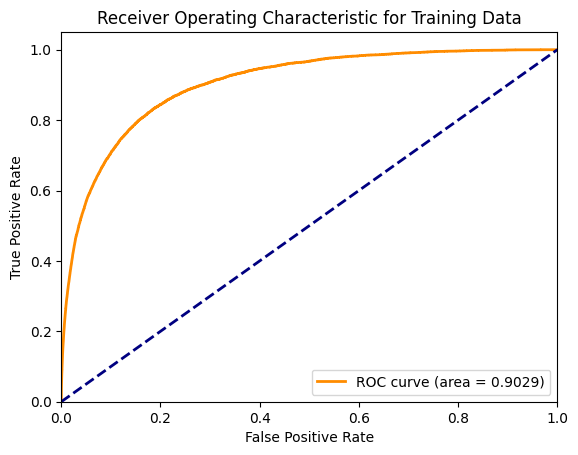

In [ ]:
# Generate ROC Curve for train data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_train_prob[:,1])

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

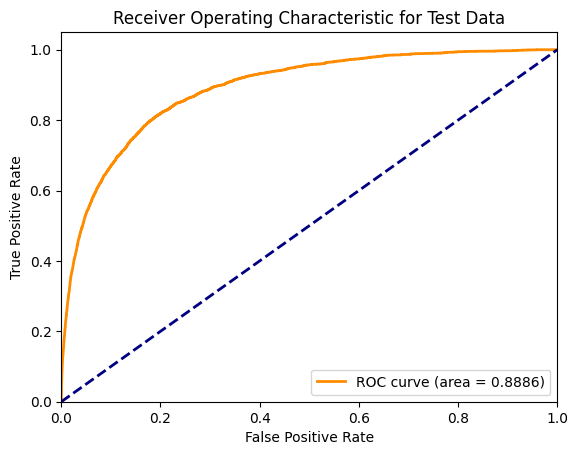

In [ ]:
# Generate ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()

## Train Model on SMOTE Data

In [ ]:
xgb.fit(X_train_resampled, y_train_resampled)

# Get predicitions
y_train_pred = xgb.predict(X_train_resampled)
y_test_pred = xgb.predict(X_test)

# Get probabilities
y_train_prob = xgb.predict_proba(X_train_resampled)
y_test_prob = xgb.predict_proba(X_test)

In [ ]:

# Calc accuracy, precision, recall, and f1 for training data
acc_train = accuracy_score(y_train_resampled, y_train_pred)
rec_train = recall_score(y_train_resampled, y_train_pred)
prec_train = precision_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)
# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calc accuracy, precision, recall, and f1 for test data
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9073
Precision: 0.8491
Recall.  : 0.9906
F1.      : 0.9144
 -- test set -- 
Accuracy : 0.8223
Precision: 0.0398
Recall.  : 0.6730
F1.      : 0.0751


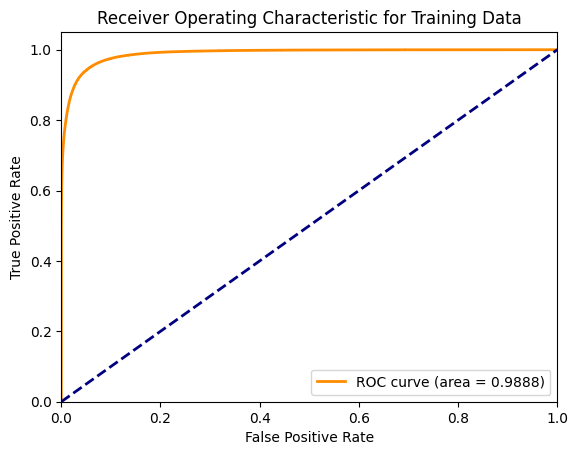

In [ ]:
# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_train_resampled.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train_resampled.cat.codes, y_train_prob[:,1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

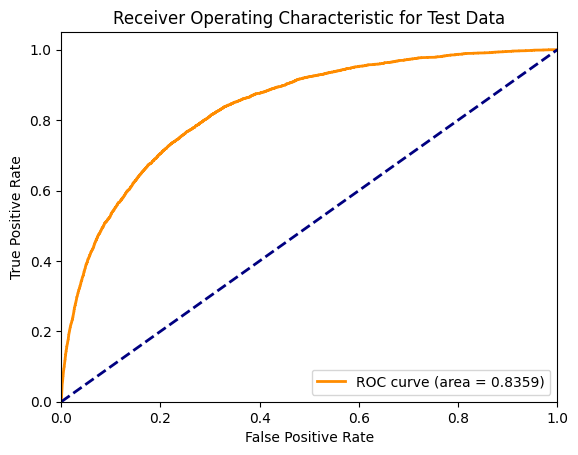

In [ ]:
# Generate ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()

## Fit model on data with dummy vars

In [ ]:
# reload data
df = pd.read_csv('/content/drive/MyDrive/BAN 6053/BAN6025Project2Data.csv')
# convert Target_Y to category
df['Target_Y'] = df['Target_Y'].astype('category')
# drop X30
df = df.drop(columns=['X30'])

In [ ]:
# drop target variable
X = df.drop(columns=['Target_Y'], axis=1)

# get dummy vars
X = pd.get_dummies(X, columns = ['X8', 'X15', 'X17', 'X18', 'X19', 'X20', 'X22', 'X24','X25', 'X27', 'X28', 'X29', 'X31'], drop_first=True, dtype = 'float')
y = df['Target_Y']

# 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700000 entries, 533494 to 228494
Data columns (total 54 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   X1             700000 non-null  float64
 1   X2             700000 non-null  float64
 2   X3             700000 non-null  int64  
 3   X4             700000 non-null  int64  
 4   X5             700000 non-null  int64  
 5   X6             700000 non-null  float64
 6   X7             700000 non-null  float64
 7   X9             700000 non-null  int64  
 8   X10            700000 non-null  float64
 9   X11            700000 non-null  float64
 10  X12            700000 non-null  float64
 11  X13            700000 non-null  int64  
 12  X14            700000 non-null  int64  
 13  X16            700000 non-null  int64  
 14  X21            700000 non-null  int64  
 15  X23            700000 non-null  int64  
 16  X26            700000 non-null  float64
 17  X8_AB          700000 non-nul

In [ ]:
xgb = XGBClassifier(is_unbalance = True, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, is_unbalance=True,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
# get predicitions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# get probabilities
y_train_prob = xgb.predict_proba(X_train)
y_test_prob = xgb.predict_proba(X_test)

In [ ]:
# Calculate acc, prec, recall, and f1
acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9899
Precision: 0.8325
Recall.  : 0.1069
F1.      : 0.1894
 -- test set -- 
Accuracy : 0.9889
Precision: 0.4533
Recall.  : 0.0396
F1.      : 0.0728


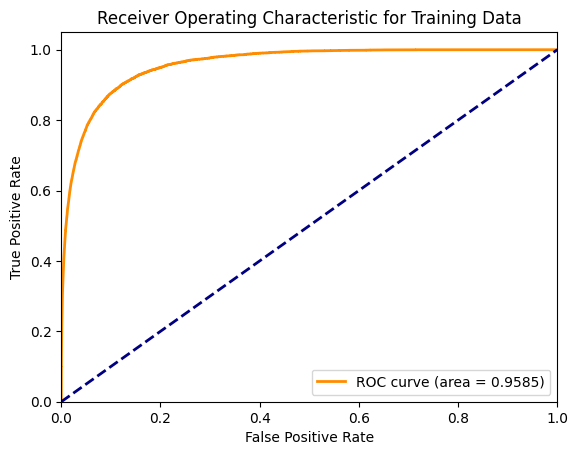

In [ ]:
# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_train_prob[:,1])

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

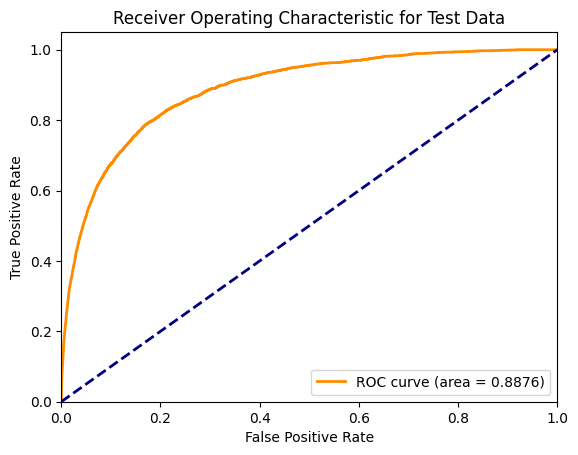

In [ ]:
# Generate ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()


## Fit Model without SMOTE using scale_pos_weight

In [ ]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos

# Define and train XGBoost model
xgb = XGBClassifier(
    n_estimators=300,          # Increase estimators for better learning
    learning_rate=0.05,        # Lower learning rate for better generalization
    max_depth=5,               # Moderate depth to avoid overfitting
    min_child_weight=3,        # Avoids overfitting
    subsample=0.8,             # Controls row sampling for generalization
    colsample_bytree=0.8,      # Controls feature sampling
    scale_pos_weight=scale_pos_weight,  # Adjusts class imbalance
    reg_alpha=0.5,             # L1 regularization to reduce overfitting
    reg_lambda=0.5,            # L2 regularization
    objective="binary:logistic",
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Generate predicitions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Generate probabilities
y_train_prob = xgb.predict_proba(X_train)
y_test_prob = xgb.predict_proba(X_test)

In [ ]:
# Calculate accuracy, precision, recall, and f1 for training data
acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train,y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calculate accuracy, precision, recall, and f1 for test data
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.8468
Precision: 0.0592
Recall.  : 0.8655
F1.      : 0.1108
 -- test set -- 
Accuracy : 0.8454
Precision: 0.0537
Recall.  : 0.7827
F1.      : 0.1004


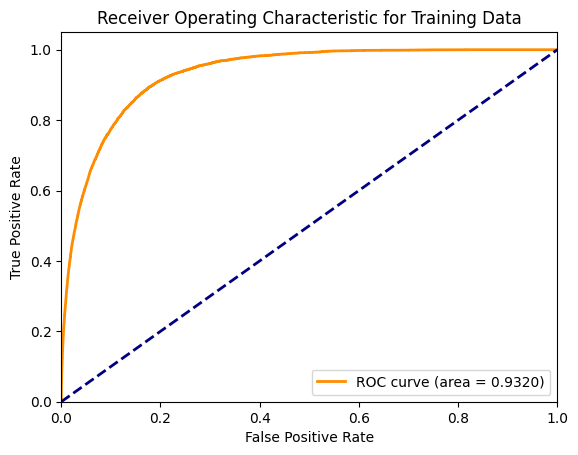

In [ ]:
# Generate ROC Curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_train_prob[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_train_prob[:,1])

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()

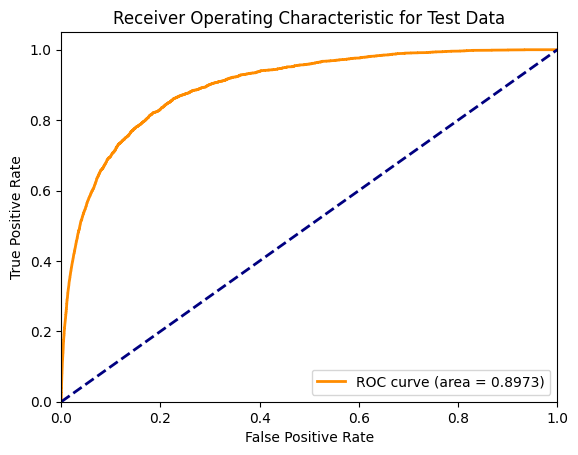

In [ ]:
# Generate ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_test_prob[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_test_prob[:,1])

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw =2, label = f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc="lower right")
plt.show()

## Feature importance

    importance        feature
41    0.139684    X27_windows
43    0.072185          X28_1
31    0.066902         X18_BE
36    0.052369          X22_1
34    0.041522          X19_1
28    0.038810         X18_BB
45    0.034775          X29_1
29    0.033717         X18_BC
2     0.030550             X3
0     0.029063             X1
4     0.025483             X5
27    0.025042          X17_1
15    0.023802            X23
3     0.022575             X4
13    0.020743            X16
46    0.020208          X29_2
39    0.018478  X27_macintosh
1     0.017890             X2
12    0.015513            X14
21    0.014338         X15_CB
11    0.014278            X13
25    0.013838         X15_CF
49    0.013750          X31_3
37    0.012707          X24_1
18    0.012376          X8_AC
6     0.011798             X7
24    0.011563         X15_CE
30    0.010560         X18_BD
10    0.009679            X12
14    0.009560            X21
35    0.009366          X20_1
23    0.009030         X15_CD
5     0.00

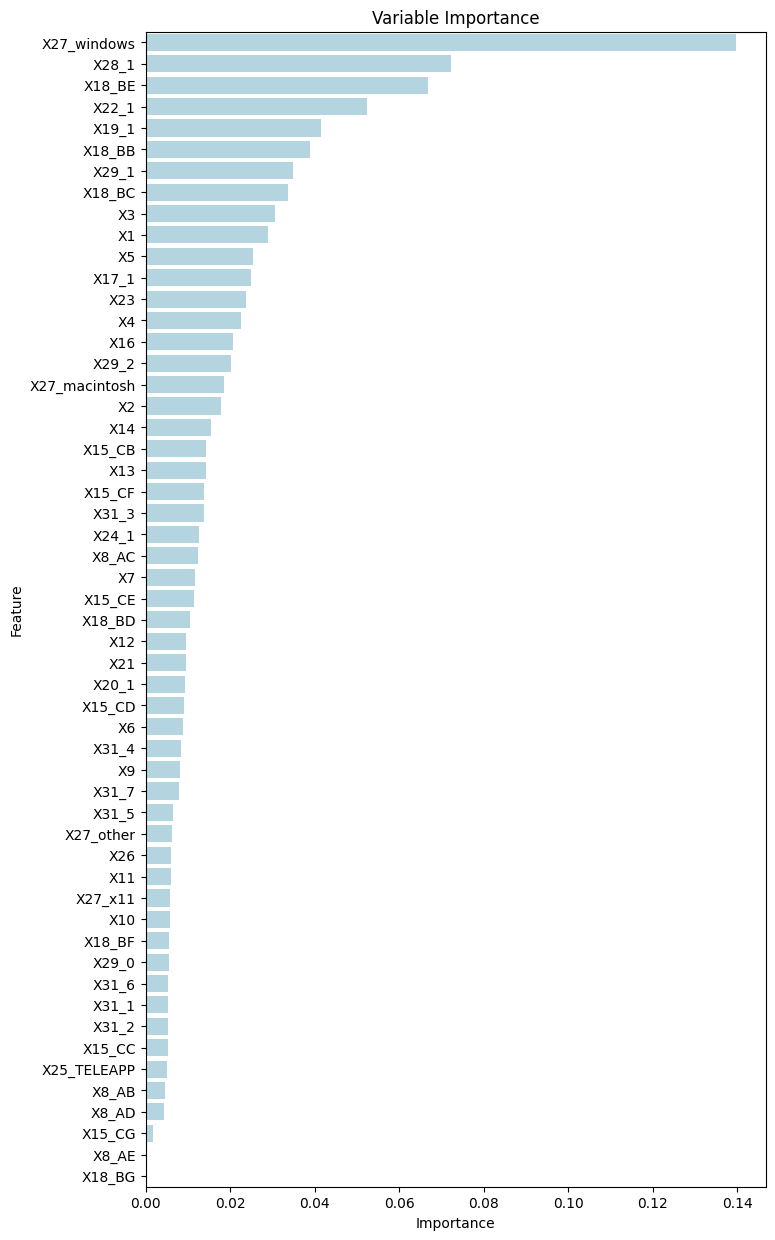

In [ ]:
#calculate feature importance
xgb_imp = xgb.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = xgb_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(8,15))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

## **Tune Parameters**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
# Define Model
xgb = XGBClassifier(random_state = 42, n_jobs = -1)

# Define parameter Grid
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 9],        # Maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],     # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0],  # Fraction of features used per tree
    'reg_alpha': [0, 0.1, 0.5, 1],    # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1]    # L2 regularization
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,  # Number of different combinations to try
    scoring='recall',  # Optimizing for F1 score (change if needed)
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all processors for efficiency
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters and Score
print("Best parameters found: ", random_search.best_params_)
print("Best recall score found: ", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best recall score found:  0.03899000770357164


In [ ]:
# Refit xgb model with best parameters
xgb_best = XGBClassifier(subsample=1.0,
    reg_alpha=0.5,
    reg_lambda=0.5,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
                         n_estimators =500,
                         max_depth = 5,
                         learning_rate = 0.05,
                         colsample_bytree = 0.7,
                         n_jobs = -1)

# Fit model
xgb_best.fit(X_train, y_train)
# Get predicitions
y_train_pred = xgb_best.predict(X_train)
y_test_pred = xgb_best.predict(X_test)

# get probabilities
y_train_prob = xgb_best.predict_proba(X_train)
y_test_prob = xgb_best.predict_proba(X_test)

# Calculate metrics for training data
acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

# Calculate metrics for test data
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9894
Precision: 0.7321
Recall.  : 0.0584
F1.      : 0.1082
 -- test set -- 
Accuracy : 0.9890
Precision: 0.5463
Recall.  : 0.0375
F1.      : 0.0701


In [ ]:
# apply smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# fit xgb_best to smote data
xgb_best.fit(X_train_resampled, y_train_resampled)

# Get predicitions
y_train_pred = xgb_best.predict(X_train_resampled)
y_test_pred = xgb_best.predict(X_test)

# Get probabilties
y_train_prob = xgb_best.predict_proba(X_train_resampled)
y_test_prob = xgb_best.predict_proba(X_test)

In [ ]:
# calc accuracy, recall, prec, f1
acc_train = accuracy_score(y_train_resampled, y_train_pred)
prec_train = precision_score(y_train_resampled, y_train_pred)
rec_train = recall_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)

# print
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1.      : {:.4f}".format(f1_train))

acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# print
print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1.      : {:.4f}".format(f1_test))


 -- train set -- 
Accuracy : 0.9929
Precision: 0.9993
Recall.  : 0.9866
F1.      : 0.9929
 -- test set -- 
Accuracy : 0.9888
Precision: 0.4375
Recall.  : 0.0529
F1.      : 0.0944
